In [1]:
import tensorflow as tf


In [2]:
import pathlib
import os
#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

In [3]:
import matplotlib.pyplot as plt

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools


In [5]:
#train_data_url="C:/Users/khurd/Documents/295B/LandData.csv"
#train_file_path = tf.keras.utils.get_file("train.csv",train_data_url)

In [6]:
#defaults=[tf.int32]*55
#dataset=tf.contrib.data.CsvDataset(["C:/Users/khurd/Documents/295B/LandData.csv"].defaults)
#print(list(dataset.take(1)))

In [7]:
df=pd.read_csv("C:/Users/khurd/Documents/295B/LandData.csv")

In [8]:
df

,MSA,Date,Home Value,Structure Cost,Land Value,Land Share (Pct),Home Price Index,Land Price Index
0,ATLANTA,1984Q4,92559,67164,25394,27.40%,0.537,0.327
1,ATLANTA,1985Q1,92880,67876,25003,26.90%,0.539,0.324
2,ATLANTA,1985Q2,92928,68491,24437,26.30%,0.539,0.319
3,ATLANTA,1985Q3,97008,69069,27939,28.80%,0.563,0.368
4,ATLANTA,1985Q4,98530,69601,28929,29.40%,0.571,0.384
...,...,...,...,...,...,...,...,...
6205,WASHINGTONDC,2017Q2,556626,272716,283910,51.00%,2.090,2.397
6206,WASHINGTONDC,2017Q3,558709,274045,284665,51.00%,2.097,2.406
6207,WASHINGTONDC,2017Q4,565120,275643,289476,51.20%,2.121,2.450
6208,WASHINGTONDC,2018Q1,570734,280434,290300,50.90%,2.142,2.460


In [9]:
features_considered=['MSA','Home Value']

In [10]:
features = df[features_considered]
features.index = df['Date']
features.head()

,MSA,Home Value
Date,,
1984Q4,ATLANTA,92559
1985Q1,ATLANTA,92880
1985Q2,ATLANTA,92928
1985Q3,ATLANTA,97008
1985Q4,ATLANTA,98530


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4F70263C8>],
      dtype=object)

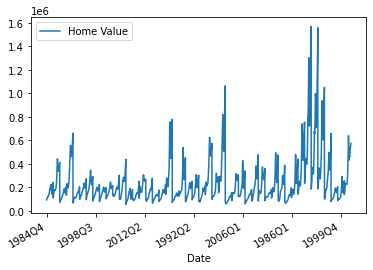

In [11]:
features.plot(subplots=True)

In [12]:
TRAIN_SPLIT = 4000

In [13]:
tf.random.set_seed(13)

In [14]:
#dataset = features.values
#data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
#data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [15]:
uni_data = df['Home Value']
uni_data.index = df['Date']
uni_data.head()

Date
1984Q4    92559
1985Q1    92880
1985Q2    92928
1985Q3    97008
1985Q4    98530
Name: Home Value, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4F9151438>],
      dtype=object)

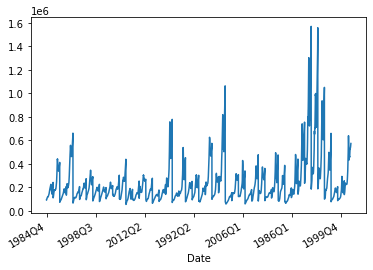

In [16]:
uni_data.plot(subplots=True)

In [17]:
uni_data = uni_data.values

In [18]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [19]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [20]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [21]:
univariate_past_history = 100
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [22]:
uni_data = df['Home Value','Structure Cost','Land Value','Home Price Index']
uni_data.index = df['MSA']
uni_data.head()

MSA
ATLANTA    92559
ATLANTA    92880
ATLANTA    92928
ATLANTA    97008
ATLANTA    98530
Name: Home Value, dtype: int64

In [23]:
#tf.gather_nd(
    #'Home Value', 'MSA','Date', batch_dims=0, name=None
#)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4F91D07F0>],
      dtype=object)

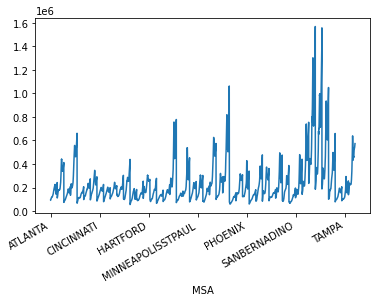

In [24]:
uni_data.plot(subplots=True)

In [25]:
uni_data = np.float32(uni_data.values)

In [26]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [27]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [28]:
univariate_past_history = 100
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [29]:
#x_train_uni.dtype
y_train_uni.dtype


dtype('float32')

In [30]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target Home Value to predict')
print (y_train_uni[0])

Single window of past history
[[-0.8546]
 [-0.852 ]
 [-0.8517]
 [-0.8196]
 [-0.8076]
 [-0.7973]
 [-0.7852]
 [-0.7756]
 [-0.7635]
 [-0.7471]
 [-0.734 ]
 [-0.7228]
 [-0.7158]
 [-0.7033]
 [-0.6904]
 [-0.6875]
 [-0.6858]
 [-0.6777]
 [-0.6756]
 [-0.6668]
 [-0.6594]
 [-0.6618]
 [-0.6658]
 [-0.6664]
 [-0.6715]
 [-0.6711]
 [-0.666 ]
 [-0.6639]
 [-0.6629]
 [-0.6621]
 [-0.6593]
 [-0.6488]
 [-0.6474]
 [-0.6431]
 [-0.6305]
 [-0.6205]
 [-0.6111]
 [-0.5959]
 [-0.5882]
 [-0.5781]
 [-0.5647]
 [-0.5532]
 [-0.5512]
 [-0.542 ]
 [-0.5302]
 [-0.5178]
 [-0.5086]
 [-0.5012]
 [-0.4901]
 [-0.4819]
 [-0.469 ]
 [-0.4586]
 [-0.4432]
 [-0.4272]
 [-0.4057]
 [-0.3916]
 [-0.3692]
 [-0.3473]
 [-0.3265]
 [-0.3053]
 [-0.2813]
 [-0.2558]
 [-0.2263]
 [-0.2101]
 [-0.1916]
 [-0.1729]
 [-0.1554]
 [-0.137 ]
 [-0.1238]
 [-0.1102]
 [-0.1   ]
 [-0.0874]
 [-0.0746]
 [-0.0593]
 [-0.0506]
 [-0.0427]
 [-0.0292]
 [-0.0124]
 [ 0.0037]
 [ 0.0149]
 [ 0.0352]
 [ 0.0631]
 [ 0.0887]
 [ 0.0953]
 [ 0.1201]
 [ 0.1524]
 [ 0.1629]
 [ 0.1636]
 [

In [31]:
def create_time_steps(length):
  return list(range(-length, 0))

In [32]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\khurd\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

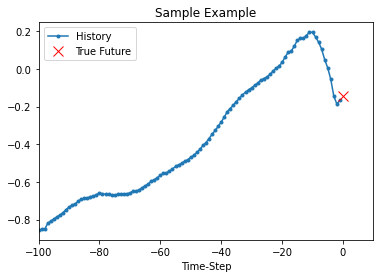

In [33]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [34]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from 'C:\\Users\\khurd\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

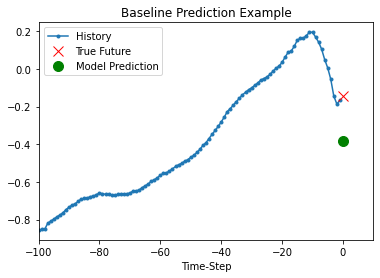

In [35]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [36]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()


val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
val_univariate
y_val_uni
print(x_val_uni.shape[-2:])
print(y_val_uni.shape)

(100, 1)
(2110,)


In [37]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [38]:

for x, y in val_univariate.take(1):
    x=np.float32(x)
    print(simple_lstm_model.predict(x).shape)
    

(256, 1)


In [39]:
print(x.dtype)

float32


In [40]:
print(val_univariate.take(1))

<TakeDataset shapes: ((None, 100, 1), (None,)), types: (tf.float32, tf.float32)>


In [42]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 22s 108ms/step - loss: 0.0297 - val_loss: 0.0980
Epoch 2/10
200/200 [==============================] - 20s 102ms/step - loss: 0.0288 - val_loss: 0.0958
Epoch 3/10
200/200 [==============================] - 22s 111ms/step - loss: 0.0283 - val_loss: 0.0941
Epoch 4/10
200/200 [==============================] - 22s 108ms/step - loss: 0.0286 - val_loss: 0.0926
Epoch 5/10
200/200 [==============================] - 22s 109ms/step - loss: 0.0279 - val_loss: 0.0901
Epoch 6/10
200/200 [==============================] - 21s 105ms/step - loss: 0.0280 - val_loss: 0.0887
Epoch 7/10
200/200 [==============================] - 23s 114ms/step - loss: 0.0272 - val_loss: 0.0874
Epoch 8/10
200/200 [==============================] - 20s 99ms/step - loss: 0.0282 - val_loss: 0.0862
Epoch 9/10
200/200 [==============================] - 20s 98ms/step - loss: 0.0280 - val_loss: 0.0856
Epoch 10/10
200/200 [===========

In [43]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

(1,)


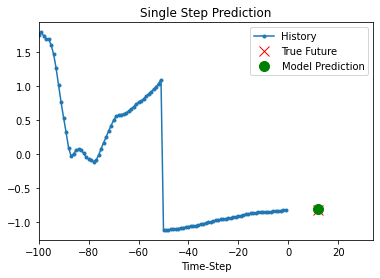

(1,)


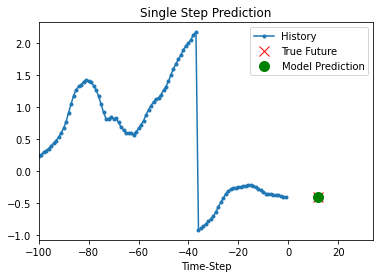

(1,)


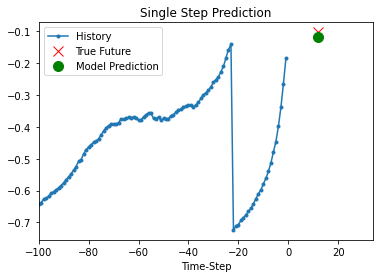

In [52]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  print(simple_lstm_model.predict(x).shape)
  
  plot.show()
